In [1]:
import tensorflow as tf
import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [7]:
y_train[6:11]

array([[2],
       [7],
       [8],
       [3],
       [4]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[6:11]

array([2, 7, 8, 3, 4], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:

#Let's plot some images to see what they are
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

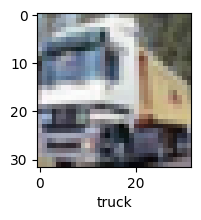

In [14]:
plot_sample(X_train, y_train, 1)

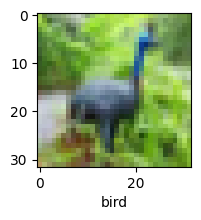

In [18]:
plot_sample(X_train, y_train, 6)

In [19]:
#Normalize the images to a number from 0 to 1.
#Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.
#Hence to normalize in 0-->1 range, we need to divide it by 255
#Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
#Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 378s 239ms/step - loss: 1.9130 - accuracy: 0.3231
Epoch 2/5
1563/1563 [==============================] - 373s 239ms/step - loss: 1.6691 - accuracy: 0.4025
Epoch 3/5
1563/1563 [==============================] - 369s 236ms/step - loss: 1.5879 - accuracy: 0.4337
Epoch 4/5
1563/1563 [==============================] - 397s 254ms/step - loss: 1.5353 - accuracy: 0.4506
Epoch 5/5
1563/1563 [==============================] - 380s 243ms/step - loss: 1.4985 - accuracy: 0.4629


In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 13s 39ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.50      0.52      1000
           1       0.53      0.67      0.59      1000
           2       0.34      0.32      0.33      1000
           3       0.29      0.29      0.29      1000
           4       0.52      0.26      0.34      1000
           5       0.35      0.45      0.39      1000
           6       0.46      0.56      0.50      1000
           7       0.52      0.53      0.53      1000
           8       0.65      0.48      0.55      1000
           9       0.46      0.52      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



In [22]:
#Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5073 - accuracy: 0.4558
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1552 - accuracy: 0.5935
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0152 - accuracy: 0.6470
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9337 - accuracy: 0.6762
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8721 - accuracy: 0.6975
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8150 - accuracy: 0.7181
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7777 - accuracy: 0.7291
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7391 - accuracy: 0.7439
Epoch 9/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7019 - accuracy: 0.7569
Epoch 10/10
1563/1563 [==============================] - 76s 48m

In [25]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.9248 - accuracy: 0.6932


[0.9248412847518921, 0.6931999921798706]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 11s 34ms/step


array([[7.3463735e-03, 7.8001525e-05, 4.5310613e-02, 5.9889293e-01,
        1.8543673e-03, 2.8417367e-01, 3.3980399e-02, 3.3543241e-04,
        2.0923175e-02, 7.1051214e-03],
       [1.7687080e-03, 1.6247692e-02, 4.4270064e-06, 2.9478031e-07,
        2.0227537e-07, 3.9787085e-09, 2.4015147e-08, 1.8108731e-10,
        9.8165512e-01, 3.2345456e-04],
       [5.2393474e-02, 2.9901052e-01, 5.2552130e-03, 1.2812363e-03,
        4.3116955e-04, 1.3998232e-04, 4.1169510e-04, 4.9692526e-04,
        5.6310195e-01, 7.7477694e-02],
       [9.4299090e-01, 2.5617264e-03, 9.1867521e-03, 3.4033375e-05,
        1.4385038e-04, 3.1169276e-07, 1.9403760e-04, 4.2985162e-06,
        4.4844422e-02, 3.9604267e-05],
       [3.1697327e-06, 1.4470036e-05, 5.5341343e-03, 3.2416496e-02,
        6.9791749e-02, 1.2190775e-02, 8.8000596e-01, 1.9057215e-05,
        1.2238446e-05, 1.1950520e-05]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

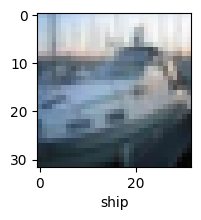

In [29]:
plot_sample(X_test, y_test,2)

In [30]:
classes[y_classes[2]]

'ship'